# Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

%matplotlib inline

# Data Preparation

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist.npz')
x_train = x_train/255
x_test = x_test/255
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


# Reduce Unit Size from 784 to 200

In [3]:
latent_dim = 200

class Autoencoder1(Model):
  def __init__(self, latent_dim):
    super(Autoencoder1, self).__init__()
    self.latent_dim1 = latent_dim   
    self.encoder1 = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder1 = tf.keras.Sequential([
      layers.Dense(784, activation='relu'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded1 = self.encoder1(x)
    decoded1 = self.decoder1(encoded1)
    return decoded1

autoencoder1 = Autoencoder1(latent_dim)

In [4]:
autoencoder1.compile(optimizer='RMSprop', loss=losses.MeanSquaredError(), metrics=['accuracy'])

autoencoder1.fit(x_train, x_train,
                epochs=100,
                batch_size=100,
                shuffle=True,
                validation_split=0.3)

Epoch 1/100
420/420 [==============================] - 3s 6ms/step - loss: 0.0299 - accuracy: 0.4180 - val_loss: 0.0125 - val_accuracy: 0.5545
Epoch 2/100
420/420 [==============================] - 1s 3ms/step - loss: 0.0118 - accuracy: 0.5539 - val_loss: 0.0102 - val_accuracy: 0.5806
Epoch 3/100
420/420 [==============================] - 1s 3ms/step - loss: 0.0100 - accuracy: 0.5724 - val_loss: 0.0086 - val_accuracy: 0.5880
Epoch 4/100
420/420 [==============================] - 1s 4ms/step - loss: 0.0092 - accuracy: 0.5807 - val_loss: 0.0082 - val_accuracy: 0.5905
Epoch 5/100
420/420 [==============================] - 1s 3ms/step - loss: 0.0088 - accuracy: 0.5870 - val_loss: 0.0089 - val_accuracy: 0.5933
Epoch 6/100
420/420 [==============================] - 1s 3ms/step - loss: 0.0084 - accuracy: 0.5914 - val_loss: 0.0076 - val_accuracy: 0.5961
Epoch 7/100
420/420 [==============================] - 1s 4ms/step - loss: 0.0082 - accuracy: 0.5939 - val_loss: 0.0078 - val_accuracy: 0.6107

Epoch 58/100
420/420 [==============================] - 1s 3ms/step - loss: 0.0056 - accuracy: 0.6089 - val_loss: 0.0055 - val_accuracy: 0.6174
Epoch 59/100
420/420 [==============================] - 1s 3ms/step - loss: 0.0055 - accuracy: 0.6096 - val_loss: 0.0053 - val_accuracy: 0.6056
Epoch 60/100
420/420 [==============================] - 1s 3ms/step - loss: 0.0055 - accuracy: 0.6088 - val_loss: 0.0052 - val_accuracy: 0.6144
Epoch 61/100
420/420 [==============================] - 1s 3ms/step - loss: 0.0055 - accuracy: 0.6099 - val_loss: 0.0054 - val_accuracy: 0.6002
Epoch 62/100
420/420 [==============================] - 1s 4ms/step - loss: 0.0056 - accuracy: 0.6082 - val_loss: 0.0061 - val_accuracy: 0.5957
Epoch 63/100
420/420 [==============================] - 2s 4ms/step - loss: 0.0055 - accuracy: 0.6084 - val_loss: 0.0053 - val_accuracy: 0.6109
Epoch 64/100
420/420 [==============================] - 1s 3ms/step - loss: 0.0055 - accuracy: 0.6101 - val_loss: 0.0055 - val_accuracy:

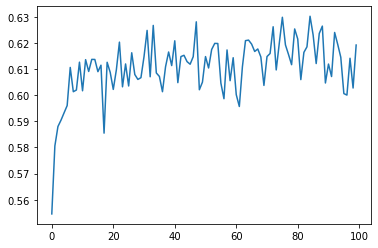

In [5]:
plt.plot(autoencoder1.history.history['val_accuracy'])

In [6]:
encoded_imgs = autoencoder1.encoder1(x_test).numpy()
decoded_imgs = autoencoder1.decoder1(encoded_imgs).numpy()

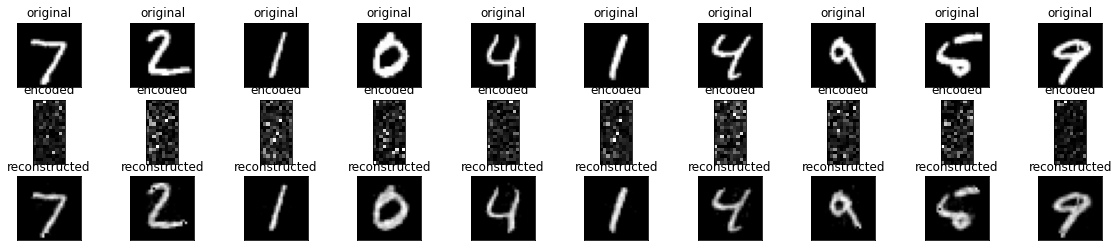

In [7]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display encoded images
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(20,10))
  plt.title("encoded")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n*2)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

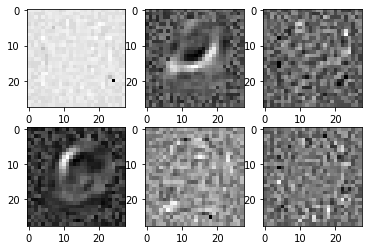

In [8]:
for layer in autoencoder1.layers:
    weights = layer.get_weights()
    
fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(weights[0][0].reshape(28, 28))
axs[0, 1].imshow(weights[0][7].reshape(28, 28))
axs[0, 2].imshow(weights[0][25].reshape(28, 28))
axs[1, 0].imshow(weights[0][93].reshape(28, 28))
axs[1, 1].imshow(weights[0][100].reshape(28, 28))
axs[1, 2].imshow(weights[0][120].reshape(28, 28))

plt.show()

# Reduce Unit Size from 200 to 45

In [9]:
latent_dim = 45

class Autoencoder2(Model):
  def __init__(self, latent_dim):
    super(Autoencoder2, self).__init__()
    self.latent_dim2 = latent_dim   
    self.encoder2 = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder2 = tf.keras.Sequential([
      layers.Dense(200, activation='relu'),
      layers.Reshape((20, 10))
    ])

  def call(self, x):
    encoded2 = self.encoder2(x)
    decoded2 = self.decoder2(encoded2)
    return decoded2

autoencoder2 = Autoencoder2(latent_dim)

In [10]:
x_train_200 = autoencoder1.encoder1.predict(x_train).reshape(60000, 20, 10)
x_test_200 = autoencoder1.encoder1.predict(x_test).reshape(10000, 20, 10)

In [11]:
autoencoder2.compile(optimizer='RMSprop', loss=losses.MeanSquaredError(), metrics=['accuracy'])

In [12]:
autoencoder2.fit(x_train_200, x_train_200,
                epochs=100,
                batch_size=100,
                shuffle=True,
                validation_split=0.3)

Epoch 1/100
420/420 [==============================] - 1s 2ms/step - loss: 0.1789 - accuracy: 0.4600 - val_loss: 0.0862 - val_accuracy: 0.6309
Epoch 2/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0818 - accuracy: 0.6468 - val_loss: 0.0729 - val_accuracy: 0.6684
Epoch 3/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.6791 - val_loss: 0.0674 - val_accuracy: 0.6858
Epoch 4/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0666 - accuracy: 0.6922 - val_loss: 0.0648 - val_accuracy: 0.6951
Epoch 5/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0639 - accuracy: 0.7025 - val_loss: 0.0627 - val_accuracy: 0.7042
Epoch 6/100
420/420 [==============================] - 1s 1ms/step - loss: 0.0628 - accuracy: 0.7059 - val_loss: 0.0625 - val_accuracy: 0.7030
Epoch 7/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0620 - accuracy: 0.7096 - val_loss: 0.0617 - val_accuracy: 0.7058

Epoch 58/100
420/420 [==============================] - 1s 2ms/step - loss: 0.0595 - accuracy: 0.7139 - val_loss: 0.0595 - val_accuracy: 0.7107
Epoch 59/100
420/420 [==============================] - 1s 1ms/step - loss: 0.0594 - accuracy: 0.7147 - val_loss: 0.0591 - val_accuracy: 0.7113
Epoch 60/100
420/420 [==============================] - 1s 1ms/step - loss: 0.0595 - accuracy: 0.7153 - val_loss: 0.0593 - val_accuracy: 0.7127
Epoch 61/100
420/420 [==============================] - 1s 1ms/step - loss: 0.0596 - accuracy: 0.7141 - val_loss: 0.0593 - val_accuracy: 0.7117
Epoch 62/100
420/420 [==============================] - 1s 1ms/step - loss: 0.0594 - accuracy: 0.7151 - val_loss: 0.0593 - val_accuracy: 0.7136
Epoch 63/100
420/420 [==============================] - 1s 1ms/step - loss: 0.0593 - accuracy: 0.7150 - val_loss: 0.0596 - val_accuracy: 0.7108
Epoch 64/100
420/420 [==============================] - 1s 1ms/step - loss: 0.0595 - accuracy: 0.7140 - val_loss: 0.0593 - val_accuracy:

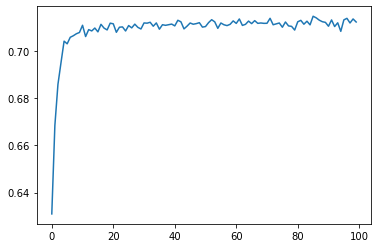

In [13]:
plt.plot(autoencoder2.history.history['val_accuracy'])

In [14]:
encoded_imgs = autoencoder2.encoder2(x_test_200).numpy()
decoded_imgs = autoencoder2.decoder2(encoded_imgs).numpy()

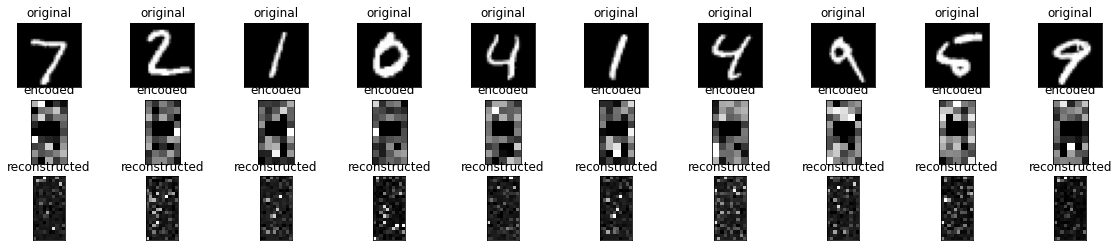

In [15]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display encoded images
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(9,5))
  plt.title("encoded")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n*2)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

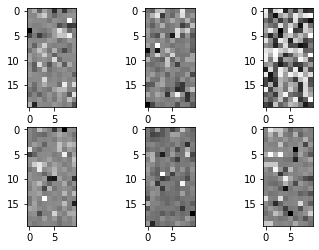

In [16]:
for layer in autoencoder2.layers:
    weights = layer.get_weights()
    
fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(weights[0][0].reshape(20, 10))
axs[0, 1].imshow(weights[0][7].reshape(20, 10))
axs[0, 2].imshow(weights[0][21].reshape(20, 10))
axs[1, 0].imshow(weights[0][30].reshape(20, 10))
axs[1, 1].imshow(weights[0][36].reshape(20, 10))
axs[1, 2].imshow(weights[0][42].reshape(20, 10))

plt.show()

# Reduce Unit Size from 45 to 10

In [17]:
ys_train = np.zeros((60000,10))
for i in range(0, 60000):
    for j in range(0, 10):
        curr_digit = y_train[i]
        if (j==curr_digit):
            ys_train[i, j] = 1

In [18]:
ys_test = np.zeros((10000,10))
for i in range(0, 10000):
    for j in range(0, 10):
        curr_digit = y_test[i]
        if (j==curr_digit):
            ys_test[i, j] = 1

In [19]:
latent_dim = 15

class Autoencoder3(Model):
  def __init__(self, latent_dim):
    super(Autoencoder3, self).__init__()
    self.latent_dim3 = latent_dim   
    self.encoder3 = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder3 = tf.keras.Sequential([
      layers.Dense(10, activation='sigmoid'),
    ])

  def call(self, x):
    encoded3 = self.encoder3(x)
    decoded3 = self.decoder3(encoded3)
    return decoded3

autoencoder3 = Autoencoder3(latent_dim)

In [20]:
x_train_45 = autoencoder2.encoder2.predict(x_train_200).reshape(60000, 9, 5)
x_test_45 = autoencoder2.encoder2.predict(x_test_200).reshape(10000, 9, 5)

In [21]:
autoencoder3.compile(optimizer='RMSprop', loss=losses.MeanSquaredError(), metrics=['accuracy'])

In [23]:
autoencoder3.fit(x_train_45, ys_train,
                epochs=100,
                batch_size=100,
                shuffle=True,
                validation_split=0.3)

Epoch 1/100
420/420 [==============================] - 1s 1ms/step - loss: 0.1159 - accuracy: 0.2536 - val_loss: 0.0547 - val_accuracy: 0.6499
Epoch 2/100
420/420 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.6814 - val_loss: 0.0388 - val_accuracy: 0.7882
Epoch 3/100
420/420 [==============================] - 0s 1ms/step - loss: 0.0368 - accuracy: 0.8072 - val_loss: 0.0303 - val_accuracy: 0.8609
Epoch 4/100
420/420 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.8559 - val_loss: 0.0258 - val_accuracy: 0.8717
Epoch 5/100
420/420 [==============================] - 0s 1ms/step - loss: 0.0259 - accuracy: 0.8700 - val_loss: 0.0237 - val_accuracy: 0.8798
Epoch 6/100
420/420 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.8752 - val_loss: 0.0225 - val_accuracy: 0.8814
Epoch 7/100
420/420 [==============================] - 1s 1ms/step - loss: 0.0228 - accuracy: 0.8782 - val_loss: 0.0217 - val_accuracy: 0.8845

420/420 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9120 - val_loss: 0.0152 - val_accuracy: 0.9135
Epoch 58/100
420/420 [==============================] - 0s 1ms/step - loss: 0.0156 - accuracy: 0.9121 - val_loss: 0.0153 - val_accuracy: 0.9139
Epoch 59/100
420/420 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9127 - val_loss: 0.0151 - val_accuracy: 0.9148
Epoch 60/100
420/420 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 0.9128 - val_loss: 0.0151 - val_accuracy: 0.9146
Epoch 61/100
420/420 [==============================] - 0s 935us/step - loss: 0.0150 - accuracy: 0.9174 - val_loss: 0.0151 - val_accuracy: 0.9145
Epoch 62/100
420/420 [==============================] - 0s 866us/step - loss: 0.0153 - accuracy: 0.9150 - val_loss: 0.0150 - val_accuracy: 0.9157
Epoch 63/100
420/420 [==============================] - 0s 833us/step - loss: 0.0151 - accuracy: 0.9154 - val_loss: 0.0150 - val_accuracy: 0.9153

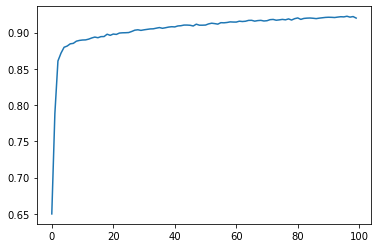

In [24]:
plt.plot(autoencoder3.history.history['val_accuracy'])

In [25]:
results = autoencoder3.evaluate(x_test_45, ys_test, batch_size=128)
print(results)

79/79 [==============================] - 0s 973us/step - loss: 0.0133 - accuracy: 0.9249
[0.013349159620702267, 0.9248999953269958]
